# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

t-statistics: -3.5383407969933938 
p-value: 0.004083270191713912
There is enough evidence to reject the null hypothesis, and accept the alternative hypothesis.
There is a significant difference in weight loss between people who followed the first diet and those who followed the second diet.


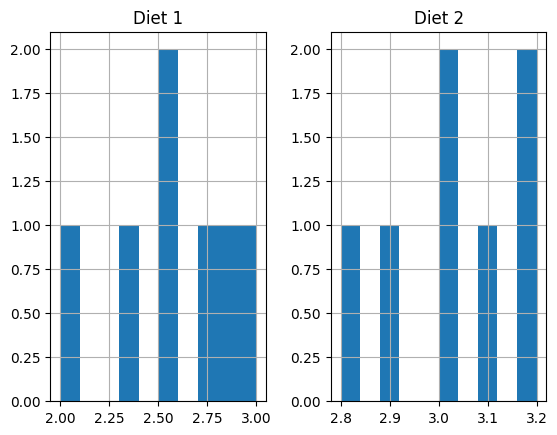

In [1]:
# TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy.stats import t, f_oneway, ttest_ind, f
import plotly.express as px 


df = pd.DataFrame()
df['Diet 1'] = [2.0,2.5,3.0,2.8,2.3,2.7,2.5]
df['Diet 2'] = [3.0,3.2,3.1,2.9,2.8,3.0,3.2]
df.head()

h0 = 'There is no difference in weight loss between people who followed the first diet and those who followed the second diet'
h1 = 'There is a significant difference in weight loss between people who followed the first diet and those who followed the second diet'

diet_1 = df['Diet 1']
diet_2 = df['Diet 2']

rv = t(df = 14-2) #not used in this example

t_stat,pvalue = ttest_ind(diet_1,diet_2, alternative='two-sided',equal_var=True) #perform a two sample t-test on the data. 
print('t-statistics:',t_stat,'\np-value:',pvalue) #the t-stat is negative, which is less than the mean of the data samples.
df.hist()
if pvalue < 0.05:
    print('There is enough evidence to reject the null hypothesis, and accept the alternative hypothesis.\nThere is a significant difference in weight loss between people who followed the first diet and those who followed the second diet.')
elif pvalue > 0.05:
    print('There is not enough evidence to reject the null hypothesis.\nThere is no difference in weight loss between people who followed the first diet and those who followed the second diet')

Calculated Manually

In [20]:
diet1 = [2.0,2.5,3.0,2.8,2.3,2.7,2.5]
diet2 = [3.0,3.2,3.1,2.9,2.8,3.0,3.2]

mean1=sum(diet1)/len(diet1)
mean2=sum(diet2)/len(diet2) 

diet1_squares = [el**2 for el in diet1]
diet2_squares = [el**2 for el in diet2]

mean_squares_1 = sum(diet1_squares)/len(diet1_squares)
mean_squares_2 = sum(diet2_squares)/len(diet2_squares)

var1 = (mean_squares_1 - mean1**2)
var2 = (mean_squares_2 -mean2**2)

t = (mean1 - mean2)/(var1/len(diet1)+var2/len(diet2))**0.5
print('t-stat:',t)



t-stat: -3.8218448679853507


## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

f_stat: 20.315789473684188 
pvalue: 0.00014047824793190475
There is enough evidence to reject the null hypothesis, and accept the alternative hypothesis.
 There is a significant difference in average corn yield between the three types of fertilizers
From the box plots, it is clear that the third fertilizer yields the best results, as the median yield (kg) is significantly higher than that of the first and second fertilizer.
The IQR is similar to that if the 2nd fertilizer, but the lower end of the range is still higher Q3 of the 2nd fertilizer.


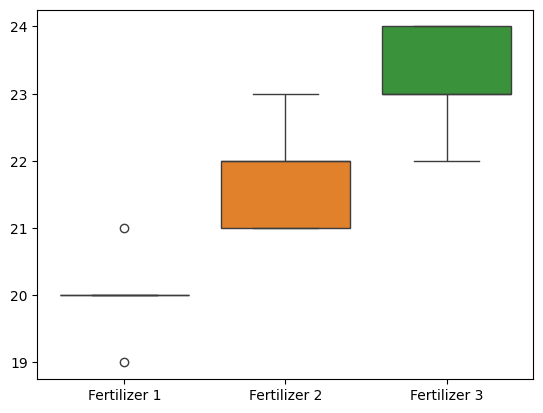

In [2]:
df2 = pd.DataFrame()
df2['Fertilizer 1'] = [20,21,20,19,20]
df2['Fertilizer 2'] = [22,21,23,22,21]
df2['Fertilizer 3'] = [24,23,22,23,24]
df2.head()

fert_1 = df2['Fertilizer 1']
fert_2 = df2['Fertilizer 2']
fert_3 = df2['Fertilizer 3']

"""Hypotheses"""
h0 = 'There is no difference in average corn yield between the three types of fertilizers'
h1 = 'There is a significant difference in average corn yield between the three types of fertilizers'

dfn = 3-1
dfd = 25-3
rv = f(dfn,dfd)

f_stat, pvalue = f_oneway(fert_1,fert_2,fert_3)
print('f_stat:',f_stat,'\npvalue:',pvalue)

if pvalue < 0.05:
    print('There is enough evidence to reject the null hypothesis, and accept the alternative hypothesis.\n',h1)
elif pvalue > 0.05:
    print('There is not enough evidence to reject the null hypothesis.\n',h0)

sns.boxplot(df2)
plt.plot()
print('From the box plots, it is clear that the third fertilizer yields the best results, as the median yield (kg) is significantly higher than that of the first and second fertilizer.\nThe IQR is similar to that if the 2nd fertilizer, but the lower end of the range is still higher Q3 of the 2nd fertilizer.')